In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [17]:
import seaborn as sns
import seaborn.objects as so
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from setup.data_wrangle import *
from setup.materials_setup import *
from analysis.dataframes import *
from analysis.volumes import *

from experiments.retrieve import retrieve_comparison_groups, retrieve_control_cases
# sns.set_style("darkgrid")


In [18]:
cases = retrieve_control_cases()
cases

[CaseData(case_name='bol_5_Medium', idf=<geomeppy.idf.IDF object at 0x1365c3b20>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_materials/bol_5_Medium/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_bol_5'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_materials/bol_5_Medium')),
 CaseData(case_name='red_b1_Medium', idf=<geomeppy.idf.IDF object at 0x12ff252a0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_materials/red_b1_Medium/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_red_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/241119_materials/red_b1_Medium')),
 CaseData(case_name='amb_b1_Medium', idf=<geomeppy.idf.IDF object at 0x12fda29e0>, sql=Energy SQLiteRe

In [12]:
df_vol = create_zone_vol_df_many(cases)
df_vol.head(1)

case_names,space_names,datetimes,qoi,values,qoi_0,values_0,qoi_1,values_1
str,str,datetime[μs],str,f64,str,f64,str,f64
"""bol_5_Medium""","""BLOCK 00 STOREY 0""",2017-07-01 00:00:00,"""AFN Zone Ventilation Volume [m…",560.633454,"""AFN Zone Mixing Volume [m3]""",0.0,"""Zone Mean Air Temperature [C]""",19.089994


In [14]:
# hist_and_ecdf_plots(df_vol, cases[0], "values", "qoi")

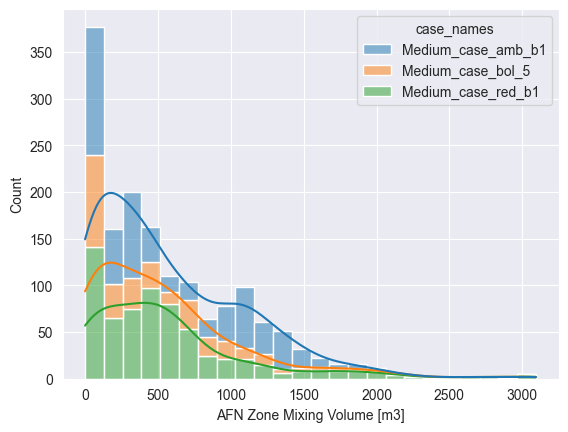

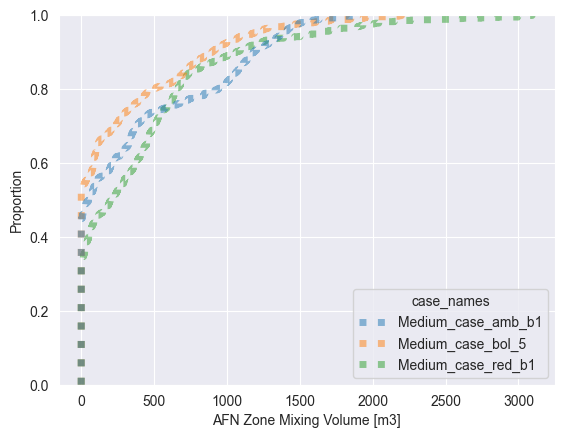

In [87]:
hist_and_ecdf_plots(df_vol, sc, "values_0", "qoi_0")

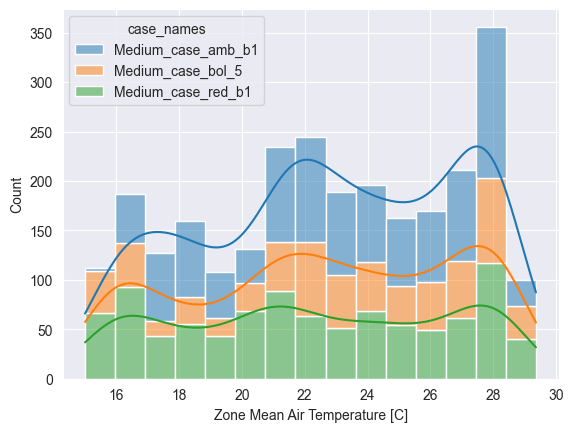

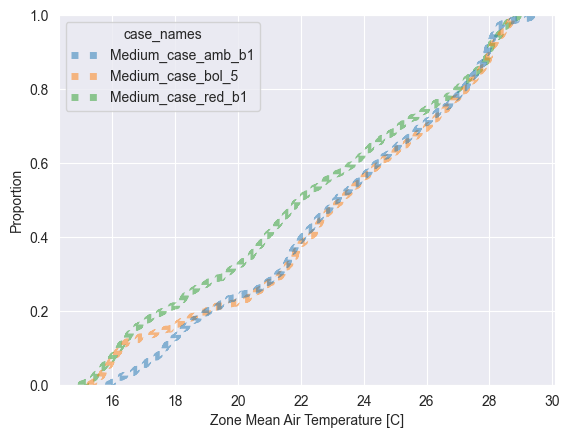

In [88]:
hist_and_ecdf_plots(df_vol, sc, "values_1", "qoi_1")

In [98]:
df_agg, g = plot_combined_vent_vs_temp(df_vol)
df_agg

case_names,vent,mixing,combined_vent,temp
str,f64,f64,f64,f64
"""Medium_case_bol_5""",340.079384,250.772877,590.852261,23.040847
"""Medium_case_red_b1""",246.739708,395.707333,642.447041,22.208548
"""Medium_case_amb_b1""",91.36269,353.926941,445.28963,23.111333


In [100]:
print(df_agg)

shape: (3, 5)
┌────────────────────┬────────────┬────────────┬───────────────┬───────────┐
│ case_names         ┆ vent       ┆ mixing     ┆ combined_vent ┆ temp      │
│ ---                ┆ ---        ┆ ---        ┆ ---           ┆ ---       │
│ str                ┆ f64        ┆ f64        ┆ f64           ┆ f64       │
╞════════════════════╪════════════╪════════════╪═══════════════╪═══════════╡
│ Medium_case_bol_5  ┆ 340.079384 ┆ 250.772877 ┆ 590.852261    ┆ 23.040847 │
│ Medium_case_red_b1 ┆ 246.739708 ┆ 395.707333 ┆ 642.447041    ┆ 22.208548 │
│ Medium_case_amb_b1 ┆ 91.36269   ┆ 353.926941 ┆ 445.28963     ┆ 23.111333 │
└────────────────────┴────────────┴────────────┴───────────────┴───────────┘


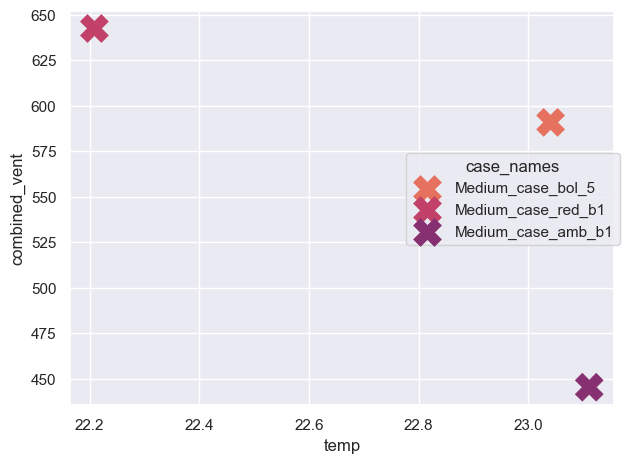

In [99]:
g.show()